# 당뇨병 환자 예측

## Summary
- 이진 분류에서는 성능평가지표로 정밀도(Precision), 재현율(Recall), F1 Score, AUC(Area Under the Curve)가 활용된다.
- 정밀도와 재현율은 Positive 데이터 세트의 예측 성능에 좀 더 초점을 맞춘 지표이며, 분류 결정 임계값을 조정하여 정밀도 또는 재현율을 높이거나 낮출 수 있다.
- F1 Score는 상호보완적인 정밀도와 재현율이 어느 한쪽으로 치우치지 않을 때 좋은 값을 가진다.
- AUC는 ROC 곡선 밑의 면적을 구한 것으로 1에 가까울 수록 좋다.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Import Data

In [16]:
diabetes_data = pd.read_csv('./diabetes.csv')

print(diabetes_data.info())
display(diabetes_data.head(3))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


- Pregnancies: 임신 횟수
- Glucose: 포도당 부하 검사 수치
- BloodPressure: 혈압(mm Hg)
- SkinThickness: 팔 삼두근 뒤쪽의 피하지방 측정값(mm)
- Insulin: 혈청 인슐린(mu U/ml)
- BMI: 체질량지수 (체중[kg]/키[m]^2)
- DiabetesPedigreeFunction: 당뇨 내력 가중치 값
- Age: 나이
- Outcome: 클래스 결정값 (0 or 1)

In [17]:
print(diabetes_data['Outcome'].value_counts())

0    500
1    268
Name: Outcome, dtype: int64


In [28]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    
    # ROC-AUC
    roc_auc = roc_auc_score(y_test, pred_proba)
    print("오차 행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

In [29]:
def precision_recall_curve_plot(y_test=None, pred_prob_c1=None):
    # 해당 Threshold에 따른 정밀도, 재현율 배열
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_c1)
    
    # 정밀도와 재현율 시각화
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary], label='recall')
    
    # X축 threshold값의 Scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    plt.xlabel("Threshold value")
    plt.ylabel("Precision and Recall value")
    plt.legend()
    plt.grid()
    plt.show()

## Logistic Regression

In [30]:
X = diabetes_data.iloc[:, :-1]
Y = diabetes_data.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=156, stratify=Y)

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[88 12]
 [23 31]]
정확도: 0.7727, 정밀도: 0.7209, 재현율: 0.5741, F1: 0.6392, AUC: 0.7919


C:\Users\user\anaconda3\envs\studyenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Precision & Recall Curve

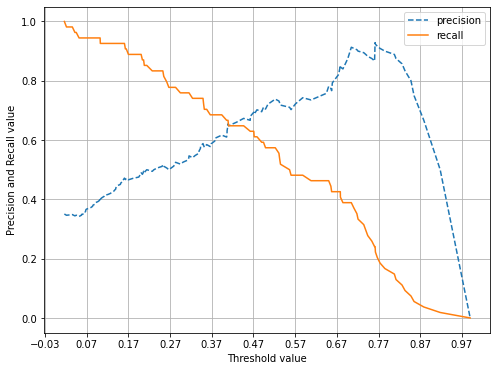

In [32]:
pred_proba_c1 = lr_clf.predict_proba(x_test)[:, 1]
precision_recall_curve_plot(y_test, pred_proba_c1)

In [34]:
# 4분위 분포 확인
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


(array([  5.,   0.,   4.,  32., 156., 211., 163.,  95.,  56.,  46.]),
 array([  0. ,  19.9,  39.8,  59.7,  79.6,  99.5, 119.4, 139.3, 159.2,
        179.1, 199. ]),
 <BarContainer object of 10 artists>)

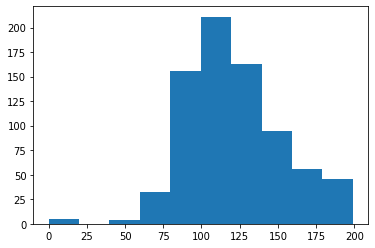

In [35]:
# Glucose 분포도
plt.hist(diabetes_data['Glucose'], bins=10)

In [37]:
len(diabetes_data)

768

In [39]:
# 0값이 있는 변수들의 0값 개수와 비율 계산
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
total_count = len(diabetes_data)

for feature in zero_features:
    zero_count = diabetes_data[diabetes_data[feature] == 0][feature].count()
    print("{0} 0 건수는 {1}, 비율은 {2:.2f}%".format(feature, zero_count, (zero_count/total_count)*100))

Glucose 0 건수는 5, 비율은 0.65%
BloodPressure 0 건수는 35, 비율은 4.56%
SkinThickness 0 건수는 227, 비율은 29.56%
Insulin 0 건수는 374, 비율은 48.70%
BMI 0 건수는 11, 비율은 1.43%


In [40]:
# 0값을 평균값으로 대체
diabetes_data[zero_features] = diabetes_data[zero_features].replace(0, diabetes_data[zero_features].mean())

## Scaling and re-train

In [41]:
X = diabetes_data.iloc[:, :-1]
Y = diabetes_data.iloc[:, -1]

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=156, stratify=Y)

lr_clf = LogisticRegression()
lr_clf.fit(x_train, y_train)

pred = lr_clf.predict(x_test)
pred_proba = lr_clf.predict_proba(x_test)[:, 1]

get_clf_eval(y_test, pred, pred_proba)

오차 행렬
[[90 10]
 [19 35]]
정확도: 0.8117, 정밀도: 0.7778, 재현율: 0.6481, F1: 0.7071, AUC: 0.8443


C:\Users\user\anaconda3\envs\studyenv\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model performance according to decision threshold change

In [43]:
from sklearn.preprocessing import Binarizer

def get_eval_by_threshold(y_test, pred_proba_c1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        
        print("임곗값:", custom_threshold)
        
        get_clf_eval(y_test, custom_predict, pred_proba_c1)

In [47]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
pred_proba = lr_clf.predict_proba(x_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1,1), thresholds)

임곗값: 0.3
오차 행렬
[[68 32]
 [11 43]]
정확도: 0.7208, 정밀도: 0.5733, 재현율: 0.7963, F1: 0.6667, AUC: 0.8443
임곗값: 0.33
오차 행렬
[[73 27]
 [12 42]]
정확도: 0.7468, 정밀도: 0.6087, 재현율: 0.7778, F1: 0.6829, AUC: 0.8443
임곗값: 0.36
오차 행렬
[[75 25]
 [16 38]]
정확도: 0.7338, 정밀도: 0.6032, 재현율: 0.7037, F1: 0.6496, AUC: 0.8443
임곗값: 0.39
오차 행렬
[[77 23]
 [16 38]]
정확도: 0.7468, 정밀도: 0.6230, 재현율: 0.7037, F1: 0.6609, AUC: 0.8443
임곗값: 0.42
오차 행렬
[[82 18]
 [17 37]]
정확도: 0.7727, 정밀도: 0.6727, 재현율: 0.6852, F1: 0.6789, AUC: 0.8443
임곗값: 0.45
오차 행렬
[[85 15]
 [19 35]]
정확도: 0.7792, 정밀도: 0.7000, 재현율: 0.6481, F1: 0.6731, AUC: 0.8443
임곗값: 0.48
오차 행렬
[[88 12]
 [19 35]]
정확도: 0.7987, 정밀도: 0.7447, 재현율: 0.6481, F1: 0.6931, AUC: 0.8443
임곗값: 0.5
오차 행렬
[[90 10]
 [19 35]]
정확도: 0.8117, 정밀도: 0.7778, 재현율: 0.6481, F1: 0.7071, AUC: 0.8443


In [49]:
binarizer = Binarizer(threshold=0.5)
pred_thres050 = binarizer.fit_transform(pred_proba[:, 1].reshape(-1,1))
get_clf_eval(y_test, pred_thres050, pred_proba[:, 1])

오차 행렬
[[90 10]
 [19 35]]
정확도: 0.8117, 정밀도: 0.7778, 재현율: 0.6481, F1: 0.7071, AUC: 0.8443
